>> Diseño Experimental


,Sesión,Sujeto,Actividad,Estrategia 1,Estrategia 2,Grupo 1,Grupo 2
0,Sesión1,Sujeto1,Act1,HRI3,HRI9,1,3
1,Sesión1,Sujeto1,Act2,HRI7,HRI5,3,2
2,Sesión1,Sujeto1,Act3,HRI0,HRI6,1,2
3,Sesión1,Sujeto1,Act4,HRI8,HRI0,3,1
4,Sesión1,Sujeto1,Act5,HRI2,HRI8,1,3
5,Sesión1,Sujeto2,Act1,HRI5,HRI2,2,1
6,Sesión1,Sujeto2,Act2,HRI9,HRI2,3,1
7,Sesión1,Sujeto2,Act3,HRI4,HRI8,2,3
8,Sesión1,Sujeto2,Act4,HRI8,HRI1,3,1
9,Sesión1,Sujeto2,Act5,HRI6,HRI3,2,1


>> Frecuencia por Estrategia


,Estrategia,Frecuencia
0,HRI0,5
1,HRI1,5
2,HRI2,5
3,HRI3,5
4,HRI4,5
5,HRI5,5
6,HRI6,5
7,HRI7,5
8,HRI8,5
9,HRI9,5


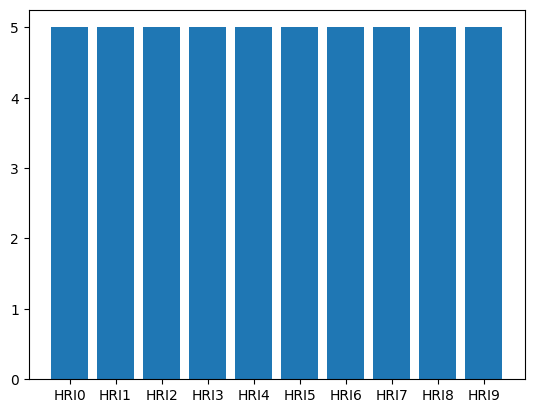

In [2]:
import pandas as pd
from collections import Counter
import itertools
import random
from math import ceil
import matplotlib.pyplot as plt

def generate_session_pairs(num_participantes, num_actividades, grupos, max_intentos=10000, seed=None):
    """Genera pares balanceados para una sola sesión"""
    if seed is not None:
        random.seed(seed)
    estrategias = [e for estrs in grupos.values() for e in estrs]
    total_pares = num_participantes * num_actividades
    freq_objetivo = total_pares * 2 / len(estrategias)
    # pares válidos
    pares_validos = []
    for g1, g2 in itertools.combinations(grupos.keys(), 2):
        for e1 in grupos[g1]:
            for e2 in grupos[g2]:
                pares_validos.append((e1, e2))
                pares_validos.append((e2, e1))
    # buscar balanceado
    for intento in range(max_intentos):
        random.shuffle(pares_validos)
        freq_actual = Counter()
        seleccion = []
        for par in pares_validos:
            e1, e2 = par
            if freq_actual[e1] < freq_objetivo and freq_actual[e2] < freq_objetivo:
                seleccion.append(par)
                freq_actual[e1] += 1
                freq_actual[e2] += 1
                if len(seleccion) == total_pares:
                    return seleccion
    raise RuntimeError("No se pudo balancear la sesión")

def generate_design(num_participantes, num_actividades, grupos, num_sesiones=1, max_intentos=5000, seed=None):
    """Genera diseño para varias sesiones concatenando sesiones individuales balanceadas"""
    all_rows = []
    for sess in range(num_sesiones):
        seed_sess = (seed or 0) + sess if seed is not None else None
        pares = generate_session_pairs(num_participantes, num_actividades, grupos, max_intentos, seed_sess)
        # asignar pares a sujetos y actividades
        for idx, (e1, e2) in enumerate(pares):
            pid = idx // num_actividades + 1
            act = idx % num_actividades + 1
            all_rows.append({
                'Sesión': f"Sesión{sess+1}",
                'Sujeto': f"Sujeto{pid}",
                'Actividad': f"Act{act}",
                'Estrategia 1': e1,
                'Estrategia 2': e2,
                'Grupo 1': next(g for g, lst in grupos.items() if e1 in lst),
                'Grupo 2': next(g for g, lst in grupos.items() if e2 in lst),
            })
    df_design = pd.DataFrame(all_rows)
    # frecuencias
    usados = [e for pair in df_design[['Estrategia 1','Estrategia 2']].values for e in pair]
    df_freq = pd.DataFrame(sorted(Counter(usados).items()), columns=['Estrategia','Frecuencia'])
    return df_design, df_freq

# Uso
grupos_def = {
    1: ["HRI0","HRI1","HRI2","HRI3"],
    2: ["HRI4","HRI5","HRI6"],
    3: ["HRI7","HRI8","HRI9"]
}
df_design, df_freq = generate_design(5, 5, grupos_def, num_sesiones=1, seed=42)
print(">> Diseño Experimental")
display(df_design)
print(">> Frecuencia por Estrategia")
display(df_freq)
plt.bar(df_freq['Estrategia'], df_freq['Frecuencia'])
plt.show()
